# Lecture 7: Feature grammars continued

Some examples and example grammars come from Chapter 9 of the NLTK book.

**Use Python 3.6 for graphics to work!**

### From Lecture 6 -- grammar with number agreement

In [2]:
import nltk
from nltk import grammar, parse, load_parser
from nltk.parse.generate import generate

In [3]:
 nltk.data.show_cfg('grammars/book_grammars/feat0.fcfg')

% start S
# ###################
# Grammar Productions
# ###################
# S expansion productions
S -> NP[NUM=?n] VP[NUM=?n]
# NP expansion productions
NP[NUM=?n] -> N[NUM=?n] 
NP[NUM=?n] -> PropN[NUM=?n] 
NP[NUM=?n] -> Det[NUM=?n] N[NUM=?n]
NP[NUM=pl] -> N[NUM=pl] 
# VP expansion productions
VP[TENSE=?t, NUM=?n] -> IV[TENSE=?t, NUM=?n]
VP[TENSE=?t, NUM=?n] -> TV[TENSE=?t, NUM=?n] NP
# ###################
# Lexical Productions
# ###################
Det[NUM=sg] -> 'this' | 'every'
Det[NUM=pl] -> 'these' | 'all'
Det -> 'the' | 'some' | 'several'
PropN[NUM=sg]-> 'Kim' | 'Jody'
N[NUM=sg] -> 'dog' | 'girl' | 'car' | 'child'
N[NUM=pl] -> 'dogs' | 'girls' | 'cars' | 'children' 
IV[TENSE=pres,  NUM=sg] -> 'disappears' | 'walks'
TV[TENSE=pres, NUM=sg] -> 'sees' | 'likes'
IV[TENSE=pres,  NUM=pl] -> 'disappear' | 'walk'
TV[TENSE=pres, NUM=pl] -> 'see' | 'like'
IV[TENSE=past] -> 'disappeared' | 'walked'
TV[TENSE=past] -> 'saw' | 'liked'


In [4]:
pagr = load_parser('grammars/book_grammars/feat0.fcfg', trace=0)
gagr = pagr.grammar()

### Number agreement
Number is expressed in the determiner (this/these), the noun (dog/dogs) and the verb (like/likes). These productions match number using a variable over the feature value.

In [5]:
gagr.productions()[0]

S[] -> NP[NUM=?n] VP[NUM=?n]

In [6]:
tp = list(gagr.productions()[0].rhs()[0].keys())[0]

In [7]:
gagr.productions()[0].rhs()[0][tp]

'NP'

#### S enforces matching of the number of NP and VP

In [8]:
for p in gagr.productions():
    if p.lhs()[tp] == 'S':
        print(p)

S[] -> NP[NUM=?n] VP[NUM=?n]


In [9]:
def prods(x):
    for p in gagr.productions():
        if p.lhs()[tp] == x:
            print(p)

#### NP enforces matching of the number of parent and children
The last production looks redundant.

In [10]:
prods('NP')

NP[NUM=?n] -> N[NUM=?n]
NP[NUM=?n] -> PropN[NUM=?n]
NP[NUM=?n] -> Det[NUM=?n] N[NUM=?n]
NP[NUM='pl'] -> N[NUM='pl']


#### Lexical entries often have constant feature values

In [11]:
prods('Det')

Det[NUM='sg'] -> 'this'
Det[NUM='sg'] -> 'every'
Det[NUM='pl'] -> 'these'
Det[NUM='pl'] -> 'all'
Det[] -> 'the'
Det[] -> 'some'
Det[] -> 'several'


In [12]:
prods('N')

N[NUM='sg'] -> 'dog'
N[NUM='sg'] -> 'girl'
N[NUM='sg'] -> 'car'
N[NUM='sg'] -> 'child'
N[NUM='pl'] -> 'dogs'
N[NUM='pl'] -> 'girls'
N[NUM='pl'] -> 'cars'
N[NUM='pl'] -> 'children'


In [13]:
prods('IV')

IV[NUM='sg', TENSE='pres'] -> 'disappears'
IV[NUM='sg', TENSE='pres'] -> 'walks'
IV[NUM='pl', TENSE='pres'] -> 'disappear'
IV[NUM='pl', TENSE='pres'] -> 'walk'
IV[TENSE='past'] -> 'disappeared'
IV[TENSE='past'] -> 'walked'


In [14]:
prods('TV')

TV[NUM='sg', TENSE='pres'] -> 'sees'
TV[NUM='sg', TENSE='pres'] -> 'likes'
TV[NUM='pl', TENSE='pres'] -> 'see'
TV[NUM='pl', TENSE='pres'] -> 'like'
TV[TENSE='past'] -> 'saw'
TV[TENSE='past'] -> 'liked'


In [15]:
cp = load_parser('grammars/book_grammars/feat0.fcfg', trace=0)
dog_sg_sg_sg = 'this dog likes children'.split()
for tree in cp.parse(dog_sg_sg_sg): print(tree)

(S[]
  (NP[NUM='sg'] (Det[NUM='sg'] this) (N[NUM='sg'] dog))
  (VP[NUM='sg', TENSE='pres']
    (TV[NUM='sg', TENSE='pres'] likes)
    (NP[NUM='pl'] (N[NUM='pl'] children))))


#### Tree with features

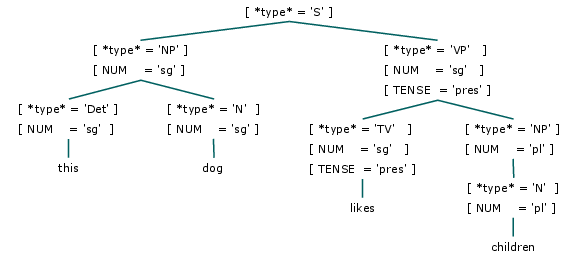

In [16]:
t1 = next(cp.parse(dog_sg_sg_sg))
t1

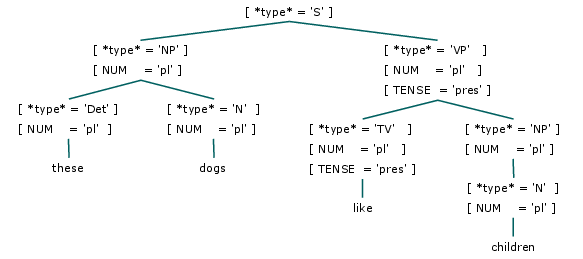

In [17]:
dog_pl_pl_pl = 'these dogs like children'.split()
t2 = next(cp.parse(dog_pl_pl_pl))
t2

## Tense agreement
Tense agrees between VP and the IV or TV head verb

In [20]:
prods('VP')

VP[NUM=?n, TENSE=?t] -> IV[NUM=?n, TENSE=?t]
VP[NUM=?n, TENSE=?t] -> TV[NUM=?n, TENSE=?t] NP[]


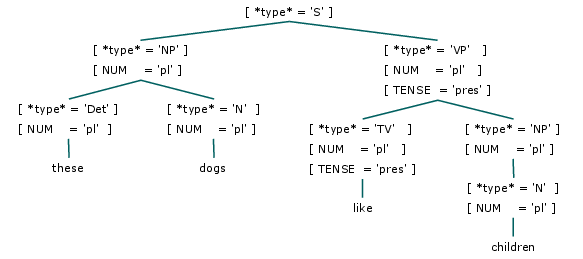

In [21]:
t2

## Feature data structures
Examples are from the NLTK book, Chapter 9

In [24]:
fs1 = nltk.FeatStruct(TENSE='past', NUM='sg')
print(fs1)

[ NUM   = 'sg'   ]
[ TENSE = 'past' ]


In [25]:
print(fs1['NUM'])
print(fs1['TENSE'])

sg
past


#### Complex values

In [27]:
fs2 = nltk.FeatStruct(POS='N', AGR=fs1)
print(fs2)

[ AGR = [ NUM   = 'sg'   ] ]
[       [ TENSE = 'past' ] ]
[                          ]
[ POS = 'N'                ]


#### Feature structure from string

In [28]:
print(nltk.FeatStruct("[POS='N', AGR=[PER=3, NUM='pl', GND='fem']]"))

[       [ GND = 'fem' ] ]
[ AGR = [ NUM = 'pl'  ] ]
[       [ PER = 3     ] ]
[                       ]
[ POS = 'N'             ]


#### Values can have various types

In [31]:
fs3 = nltk.FeatStruct(NAME='Lee', 
                      TELNO='01 27 86 42 96', 
                      AGE=33,
                      SINGLE=True)
print(fs3)

[ AGE    = 33               ]
[ NAME   = 'Lee'            ]
[ SINGLE = True             ]
[ TELNO  = '01 27 86 42 96' ]


#### Re-entrancy and graph shapes for feature structures

In [36]:
print(nltk.FeatStruct("[A='a', B=(1)[C='c'], D->(1), E->(1)]"))

[ A = 'a'             ]
[                     ]
[ B = (1) [ C = 'c' ] ]
[                     ]
[ D -> (1)            ]
[ E -> (1)            ]


In [39]:
str4 = "[NAME='Lee', \
         ADDRESS=(1)[NUMBER=74, STREET='rue Pascal'],\
         SPOUSE=[NAME='Kim', ADDRESS->(1)]]"
fs4 =  nltk.FeatStruct(str4)
print(fs4)

[ ADDRESS = (1) [ NUMBER = 74           ] ]
[               [ STREET = 'rue Pascal' ] ]
[                                         ]
[ NAME    = 'Lee'                         ]
[                                         ]
[ SPOUSE  = [ ADDRESS -> (1)  ]           ]
[           [ NAME    = 'Kim' ]           ]


 ## Unification

In [19]:
fs1 = nltk.FeatStruct("[a = 1]")
fs2 = nltk.FeatStruct("[b = 2]")
fs3 = fs2.unify(fs1)

In [20]:
print(fs3)

[ a = 1 ]
[ b = 2 ]


In [21]:
print(fs2)

[ b = 2 ]


In [22]:
fs4 = nltk.FeatStruct("[b = 3]")
fs5 = fs2.unify(fs4)
print(fs2)
print(fs4)

[ b = 2 ]
[ b = 3 ]


In [24]:
print(fs5)

None


In [25]:
fs6 = nltk.FeatStruct("[]")
print(fs6)

[]


## Subsumption
Subsumption is the information ordering on feature structures.
```
 |  subsumes(self, other)
 |      Return True if ``self`` subsumes ``other``.  I.e., return true
 |      If unifying ``self`` with ``other`` would result in a feature
 |      structure equal to ``other``.
```

In [27]:
print(fs1)
print('---')
print(fs3)
print('---')
fs1.subsumes(fs3)

[ a = 1 ]
---
[ a = 1 ]
[ b = 2 ]
---


True

In [28]:
print(fs2)
print('---')
print(fs3)
print('---')
fs2.subsumes(fs3)

[ b = 2 ]
---
[ a = 1 ]
[ b = 2 ]
---


True

In [29]:
print(fs1)
print('---')
print(fs2)
print('---')
fs1.subsumes(fs2)

[ a = 1 ]
---
[ b = 2 ]
---


False

In [31]:
print(fs3)
print('---')
print(fs2)
print('---')
fs3.subsumes(fs2)

[ a = 1 ]
[ b = 2 ]
---
[ b = 2 ]
---


False

Information ordering

`fs1` is sub-information of `fs3` 

`fs2` is sub-information of `fs3`

`fs3` is not sub-information of `fs2`, because `fs3` has extra information

$f_1 \sqsubseteq f_3$ 

$f_2 \sqsubseteq f_3$

$f_1 \sqcup f_2 = f_3$

$f_1 \sqcup f_3 = f_3$

#### Empty information

In [53]:
fs0 = nltk.FeatStruct("[]")
fs0

[]

## Slash features

In [34]:
pslash = load_parser('grammars/book_grammars/feat1.fcfg', trace=0)
gslash = pslash.grammar()

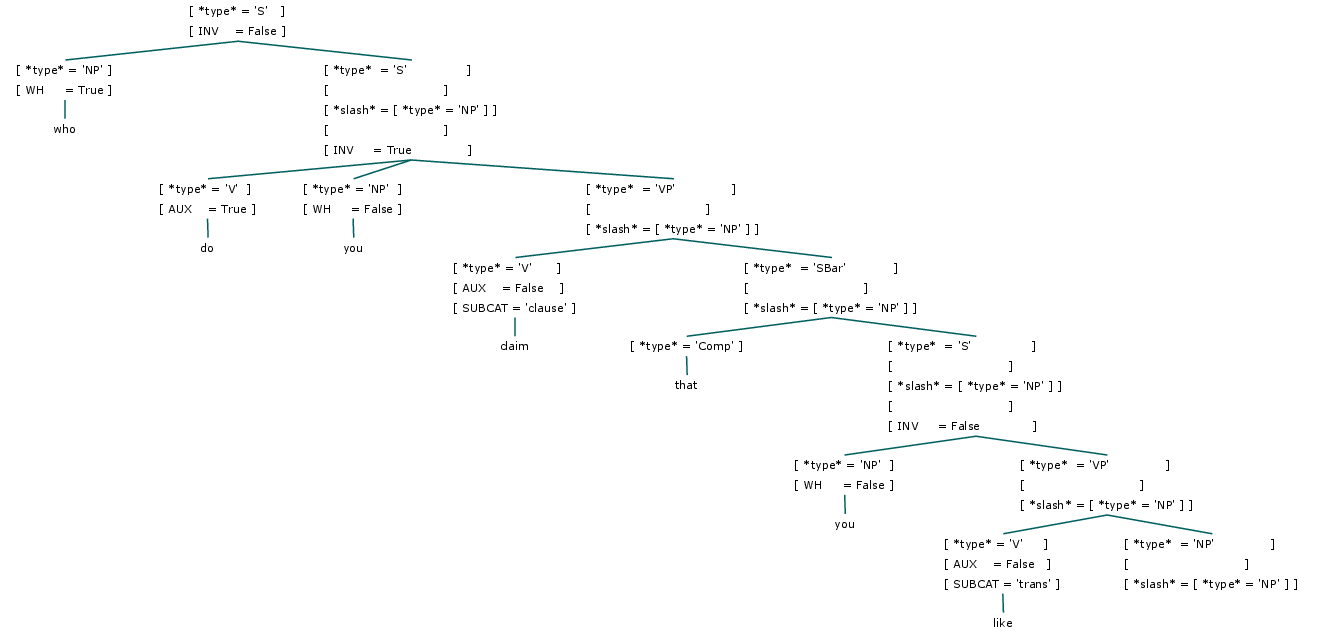

In [35]:
s1 = 'who do you claim that you like'.split()
t1 = next(pslash.parse(s1))
t1

In [36]:
t1[1][2].label()

VP[]/NP[]

In [37]:
print(t1[1][2].label())

[ *type*  = 'VP'              ]
[                             ]
[ *slash* = [ *type* = 'NP' ] ]


The verb *like* is transitive, and in this tree *it has an object*, but an empty one.
`VP/NP` is conceived as a VP with a missing NP, or with an NP moved out.

In [38]:
gslash.productions()[1]

S[-INV]/?x[] -> NP[] VP[]/?x[]

In [40]:
gslash.productions()

[S[-INV] -> NP[] VP[],
 S[-INV]/?x[] -> NP[] VP[]/?x[],
 S[-INV] -> NP[] S[]/NP[],
 S[-INV] -> Adv[+NEG] S[+INV],
 S[+INV] -> V[+AUX] NP[] VP[],
 S[+INV]/?x[] -> V[+AUX] NP[] VP[]/?x[],
 SBar[] -> Comp[] S[-INV],
 SBar[]/?x[] -> Comp[] S[-INV]/?x[],
 VP[] -> V[-AUX, SUBCAT='intrans'],
 VP[] -> V[-AUX, SUBCAT='trans'] NP[],
 VP[]/?x[] -> V[-AUX, SUBCAT='trans'] NP[]/?x[],
 VP[] -> V[-AUX, SUBCAT='clause'] SBar[],
 VP[]/?x[] -> V[-AUX, SUBCAT='clause'] SBar[]/?x[],
 VP[] -> V[+AUX] VP[],
 VP[]/?x[] -> V[+AUX] VP[]/?x[],
 V[-AUX, SUBCAT='intrans'] -> 'walk',
 V[-AUX, SUBCAT='intrans'] -> 'sing',
 V[-AUX, SUBCAT='trans'] -> 'see',
 V[-AUX, SUBCAT='trans'] -> 'like',
 V[-AUX, SUBCAT='clause'] -> 'say',
 V[-AUX, SUBCAT='clause'] -> 'claim',
 V[+AUX] -> 'do',
 V[+AUX] -> 'can',
 NP[-WH] -> 'you',
 NP[-WH] -> 'cats',
 NP[+WH] -> 'who',
 Adv[+NEG] -> 'rarely',
 Adv[+NEG] -> 'never',
 NP[]/NP[] -> ,
 Comp[] -> 'that']

In [43]:
print(gslash.productions()[10])

VP[]/?x[] -> V[-AUX, SUBCAT='trans'] NP[]/?x[]


In [45]:
gslash.productions()[1]

S[-INV]/?x[] -> NP[] VP[]/?x[]

In [33]:
gslash.productions()

NameError: name 'gslash' is not defined